# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Menganalisa data kurs merupakan hal yang penting karena kurs dapat mempengaruhi banyak sektor ekonomi terutama terhadap harga barang di pasar terutama terkait harga barang import dan eskpor.  Oleh karena itu, dilakukan scraping data inflasi untuk melakukan analisa bagaimana kondisi ekonomi Indonesia saat ini. 
Hipotesa :
- Apakah kurs indonesia dibandingkan dengan dollar stabil 

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

### Final Mission
- Scraping data harga harian, tanggal  web https://www.exchange-rates.org/history/IDR/USD/T
- Plot Pergerakan kurs

In [ ]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Input alamat website yang ingin di scrap

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.


In [6]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().


Untuk melalukan ekstrak data upaya tidak perlu manual maka Kita perlu melihat lokasi data yang ingin kita ambil ada dibagian tab yang mana dengan melihat struktur pada HTML web tersebut. Perlu dicari key dari tag dan class nya yang membuat data tersebut unik.

In [7]:


print(type(soup))

<class 'bs4.BeautifulSoup'>


In [13]:
table = soup.find('table',attrs={'class':'history-rates-data'})
print(table.prettify())

<table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-08-30">
     <span class="nowrap">
      2024-8-30
     </span>
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      15,532 IDR
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      15,532 IDR
     </span>
    </span>
   </td>
  </tr>
  <tr class="odd">
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-08-29">
     <span class="nowrap">
      2024-8-29
     </span>
    </a>

Next, we need to find the row length.

#### Cari keyword untuk lokasi data tanggal, pada data tanggl tag nya a dan classnya w

In [14]:


row2=table.find_all('a',attrs={'class':'w'})
#Menghitung jumlah row data yang akan discraping
row_length2 = len(row2)
row_length2



130

#### Cari keyword untuk lokasi data kurs, pada data kurs tag nya span dan classnya w

In [15]:
#Cari keyword untuk harga harian

row3=table.find_all('span',attrs={'class':'w'})
row_length3 = len(row3)
row_length3

130

Kemudian kita find_all() agar mendapatkan data dalam bentuk array menggunakan keyword data yang akan di scrap
find () boleh dilakukan beberapa kali sampai menemukan pola yang tepat sedangkan find_all() hanya dapat dilakukan 1x.

Lakukan pengecekan untuk data text yang diambil apakah sudah sesuai atau belum untuk menentukan logic dari scraping masing-masing atribut

In [16]:
#Data tanggal
table.find_all('a',attrs={'class':'w'})[0].text

'2024-8-30'

In [17]:
#Data nilai kurs
table.find_all('span',attrs={'class':'w'})[0].text

'1 USD = 15,532 IDR'

Do the scrapping process here 

Melakukan scraping data dengan cara looping sebanyak jumlah baris yang ingin diambil. 
Lakukan looping untuk scraping masing-masing kolom. 
Pada case ini terdapat 2 kolom tanggal dan harga harian kurs

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [18]:
temp = []  # Initiating a tuple

for i in range(0, row_length2):

    #get tanggal
    tanggal=table.find_all('a',attrs={'class':'w'})[i].text

    #get inflation mom
    kurs=table.find_all('span',attrs={'class':'w'})[i].text

    temp.append((tanggal,kurs))


temp=temp[::-1] #reverse urutan

In [19]:
temp

[('2024-3-4', '1 USD = 15,760 IDR'),
 ('2024-3-5', '1 USD = 15,743 IDR'),
 ('2024-3-6', '1 USD = 15,660 IDR'),
 ('2024-3-7', '1 USD = 15,627 IDR'),
 ('2024-3-8', '1 USD = 15,541 IDR'),
 ('2024-3-11', '1 USD = 15,525 IDR'),
 ('2024-3-12', '1 USD = 15,560 IDR'),
 ('2024-3-13', '1 USD = 15,580 IDR'),
 ('2024-3-14', '1 USD = 15,638 IDR'),
 ('2024-3-15', '1 USD = 15,647 IDR'),
 ('2024-3-18', '1 USD = 15,742 IDR'),
 ('2024-3-19', '1 USD = 15,723 IDR'),
 ('2024-3-20', '1 USD = 15,697 IDR'),
 ('2024-3-21', '1 USD = 15,727 IDR'),
 ('2024-3-22', '1 USD = 15,814 IDR'),
 ('2024-3-25', '1 USD = 15,784 IDR'),
 ('2024-3-26', '1 USD = 15,821 IDR'),
 ('2024-3-27', '1 USD = 15,901 IDR'),
 ('2024-3-28', '1 USD = 15,891 IDR'),
 ('2024-3-29', '1 USD = 15,880 IDR'),
 ('2024-4-1', '1 USD = 15,951 IDR'),
 ('2024-4-2', '1 USD = 15,952 IDR'),
 ('2024-4-3', '1 USD = 15,942 IDR'),
 ('2024-4-4', '1 USD = 15,896 IDR'),
 ('2024-4-5', '1 USD = 15,888 IDR'),
 ('2024-4-8', '1 USD = 15,912 IDR'),
 ('2024-4-9', '1 USD = 

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

Data hasil scraping dimasukan kedalam dataframe untuk dilakukan analisa data
Membuat dataframe data dengan dua atribut yaitu tanggal dan kurs

In [20]:
import pandas as pd

data = pd.DataFrame(temp,columns=('tanggal','kurs'))
data.head()

,tanggal,kurs
0,2024-3-4,"1 USD = 15,760 IDR"
1,2024-3-5,"1 USD = 15,743 IDR"
2,2024-3-6,"1 USD = 15,660 IDR"
3,2024-3-7,"1 USD = 15,627 IDR"
4,2024-3-8,"1 USD = 15,541 IDR"


Lakukan pengecekan tipe data apakah sudah sesuai atau belum.


In [21]:
data.dtypes

tanggal    object
kurs       object
dtype: object

Untuk data ini kedua atribut tipe datanya belum sesuai. Maka perlu dilakukan data cleansing.

### Data Cleansing

Setelah melakukan pengecekan data value dan tipe data. Berikut data wrangling yang dilakukan :
- Mengubah tipe data kurs menjadi string sementara untuk data cleansing mengubah '1 USD = ' menjadi '' dam ' IDR' menjadi '', dan "," menjadi "" kemudian mengubah kembali tipe datanya menjadi int (karena satuan rupiah ribuan)
- Mengubah tipe data tanggal menjadi datatime

In [23]:
#Mengubah data atribut kurs
data['kurs']=data['kurs'].astype('string')
data['kurs']=data['kurs'].str.replace("1 USD = "," ")
data['kurs']=data['kurs'].str.replace(" IDR"," ")
data['kurs']=data['kurs'].str.replace(",","")
data['kurs']=data['kurs'].astype('int')

In [28]:
data

,kurs
tanggal,
2024-03-04,15760
2024-03-05,15743
2024-03-06,15660
2024-03-07,15627
2024-03-08,15541
...,...
2024-08-26,15483
2024-08-27,15481
2024-08-28,15446


In [24]:
#Mengubah tipe data atribut tanggal
data['tanggal']=data['tanggal'].astype('datetime64[ns]')

In [25]:
data.dtypes

tanggal    datetime64[ns]
kurs                int32
dtype: object

In [141]:
#Tipe data sudah sesuai

In [26]:
data=data.set_index('tanggal')
#membuat periode menjadi index

### Data Visualization

Selanjutnya melakukan data visualization dengan membuat plot timeseries nilai kurs dollar ke rupiah

<Axes: xlabel='tanggal'>

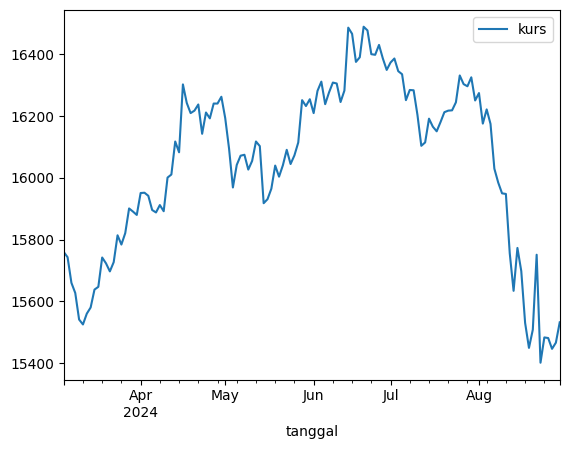

In [27]:
data.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

Sudah diakses pada local laptop saya dengan link : http://127.0.0.1:5000

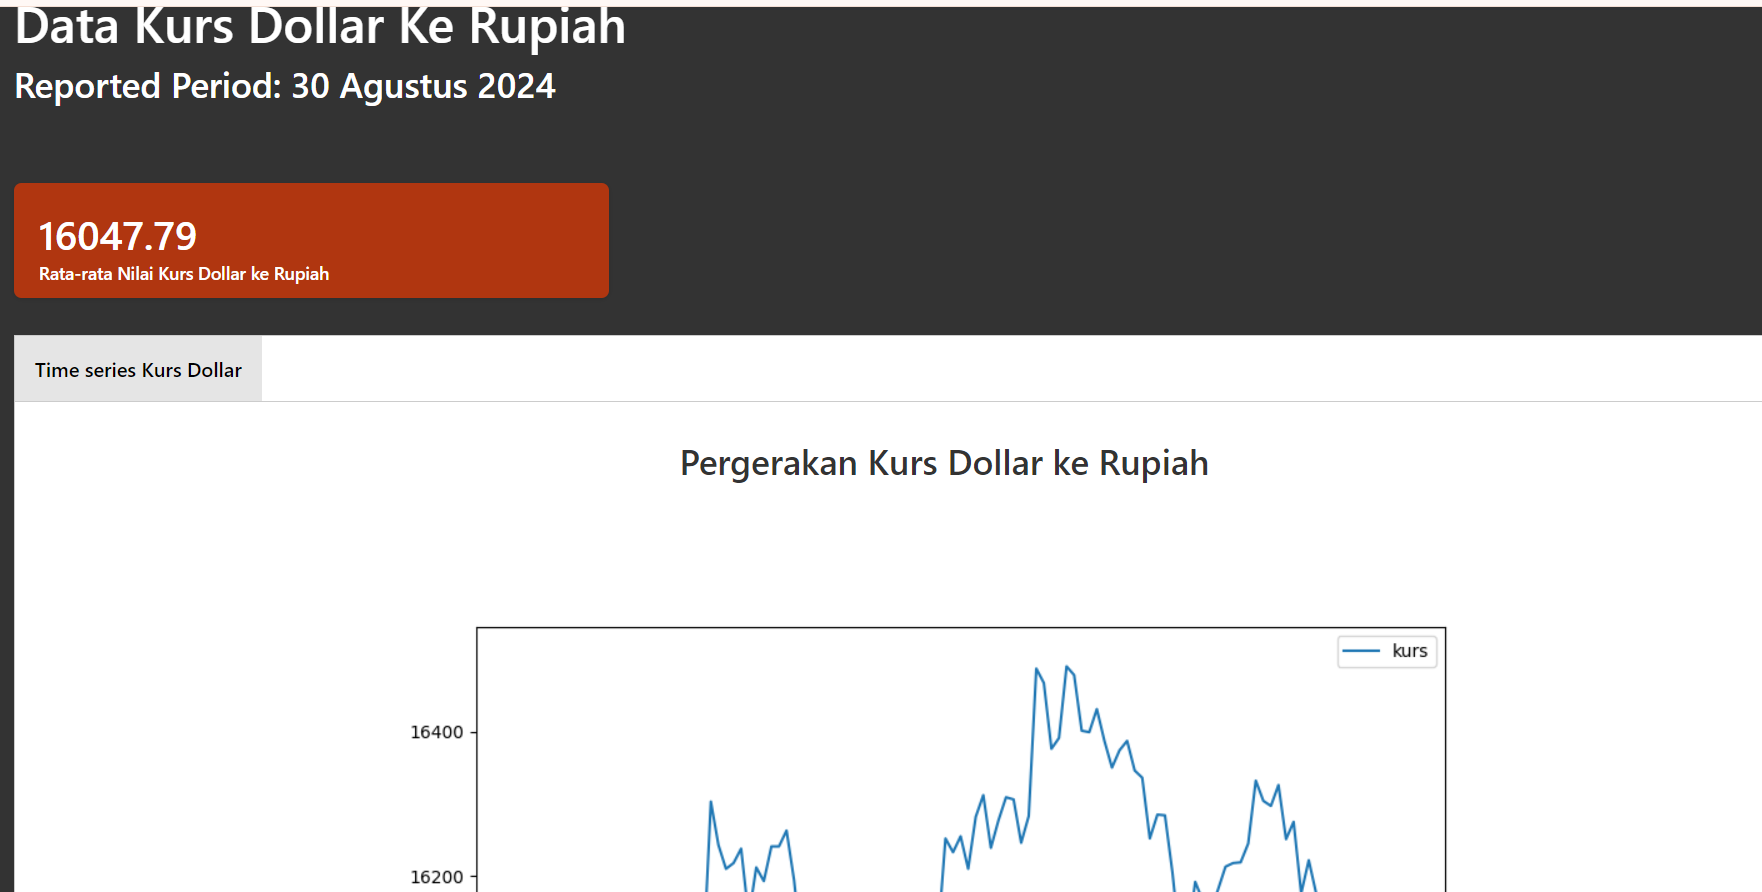

## Finishing This Notebook with Your Analysis and Conclusion

Langkah yang dilakukan :
- Melihat statistik data dengan melakukan describe 
- Melihat boxplot data

In [144]:
data.describe()

,kurs
count,130.000000
mean,16043.823077
std,277.919387
min,15401.000000
25%,15888.750000
50%,16103.500000
75%,16251.750000
max,16490.000000


<Axes: >

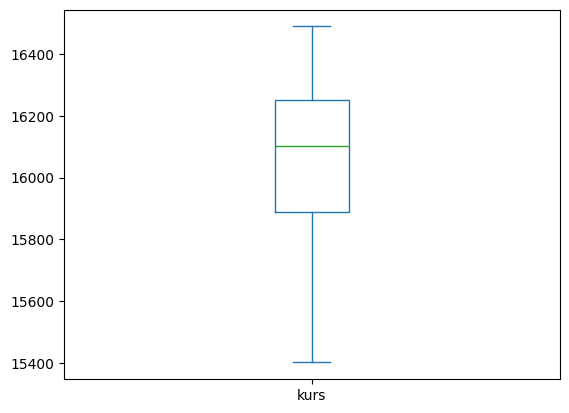

In [145]:
data.plot.box()

In [146]:
data

,kurs
tanggal,
2024-03-04,15760
2024-03-05,15743
2024-03-06,15660
2024-03-07,15627
2024-03-08,15541
...,...
2024-08-26,15483
2024-08-27,15481
2024-08-28,15446


## Analysis

Kurs Dollar :
- Nilai rerata kurs dollar dari bulan 04 Maret 2024 hingga 30 Agustus 2024 sebesar Rp16.043
- Nilai kurs dollar dari bulan 04 Maret 2024 hingga 30 Agustus 2024 paling tinggi mencapai Rp16.490
- Nilai kurs dollar dari bulan 04 Maret 2024 hingga 30 Agustus 2024 paling rendah sebesar Rp15.401
- Tidak terdapat nilai outlier pada data kurs
- Pada tanggal 30 Agustus 2024 nilai kurs cenderung naik dibandingkan hari sebelumnya

Kesimpulan :
- Nilai inflasi bulan juli 2024 meningkat dibandingkan dengan juni 2024 dan nilai rasio kenaikannya lebih tinggi dibandingkan bulan sebelumnya
- Hipotesa ditolak karena nilai kurs dollar ke rupiah cenderung naik turun. Pola data cenderung naik mulai bulan maret hingga Juni, kemudian cenderung turun mulai Juni hingga agustus 2024.


### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.